In [ ]:
# Note: The used input data are completely artificial and not real cases!! 
#       This is only an idea how you can interpret COVID-19 symptoms and determine a potential infection!!


In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\user\GitHub\Corona\Corona.csv",sep=';')
df = pd.DataFrame(data)
df
#df.head()
#df.tail()

,Age,Contact,Chill,Floppiness,Cold,Growing_pains,Fever,Continuing_cough,Diarrhea,Breathlessness,Chronic_lung_disease,Diabetes,Diagnosis
0,97,1,1,1,0,0,0,0,0,1,1,1,4
1,39,1,0,1,1,1,1,1,1,1,0,1,1
2,32,0,1,1,1,0,1,1,1,1,1,1,1
3,39,0,0,0,1,1,0,0,0,0,0,0,4
4,84,1,1,0,1,1,1,1,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,25,0,1,1,0,0,0,1,0,0,0,0,3
499996,76,1,1,1,0,0,0,0,0,0,1,1,4
499997,95,0,1,0,1,1,1,0,0,1,1,0,3
499998,66,1,0,0,1,0,0,1,0,1,0,1,3


In [ ]:
''' Some information about the columns:


    - Age: Every person could be infected, but COVID-19 is more fatal to older people (> 80).
    
    
    - Contact: Contact with a confirmed or suspected case (person with fever/cough; breathlessness; 
                contact with a confirmed person; travelling in regions at risk (especially Italy, Irane,
                France, Spain, Austria, China, USA, South Korea)).
                -> Face to face contact, physical contact (kissing, handshake), sharing a house/apartment,
                   working situation (hospital or other medical field, university, school, nursery, home)


    - Fever: Fever (> 38 °C) in the last 24 hours and in the last 4 days.
    
    
    - Diagnosis: Assessment/Evaluation based on previous symptoms.
                 - 1: Disease tends to COVID-19 infection (-> 100%); hospital stay is required.
                 - 2: Disease shows typical COVID-19 symptoms; test is required. 
                 - 3: Disease shows symptoms which can cause COVID-19; quarantine/isolation at home is required
                 - 4: Disease shows no COVID-19 symptoms, but stay at home to protect yourself and your FFF. 
'''

In [3]:
tc = df.iloc[:, 12].count()

d1 = df.loc[df["Diagnosis"] == 1, "Diagnosis"].count()
d2 = df.loc[df["Diagnosis"] == 2, "Diagnosis"].count()
d3 = df.loc[df["Diagnosis"] == 3, "Diagnosis"].count()
d4 = df.loc[df["Diagnosis"] == 4, "Diagnosis"].count()
d0 = df.loc[df["Diagnosis"] == 0, "Diagnosis"].count()


m1 = (int) (df.loc[df["Diagnosis"] == 1, "Age"].mean())
m2 = (int) (df.loc[df["Diagnosis"] == 2, "Age"].mean())
m3 = (int) (df.loc[df["Diagnosis"] == 3, "Age"].mean())
m4 = (int) (df.loc[df["Diagnosis"] == 4, "Age"].mean())



print("Total number of cases:                       " + "{:,}".format(tc).replace(",","."))
# or: print("Total number of cases: " + str(df.iloc[:, 12].count()))
print()

print("Number of cases with COVID-19 infection:     " + "{:,}".format(d1).replace(",",".") + "    (mean age: " + str(m1) + ")")
# or: print("Number of cases with COVID-19 infections: " + str(df.loc[df["Diagnosis"] == 1, "Diagnosis"].count()))

print("Number of cases with COVID-19 symptoms:      " + "{:,}".format(d2).replace(",",".") + "    (mean age: " + str(m2) + ")")
print("Number of cases in quarantine/isolation:     " + "{:,}".format(d3).replace(",","."))
print("Number of cases without COVID-19 symptoms:   " + "{:,}".format(d4).replace(",","."))
print("Number of cases without a diagnosis:         " + "{:,}".format(d0).replace(",","."))
print()



agg = d1 + d2 + d3 + d4 + d0
print("Sum of the cases (control):                  " + "{:,}".format(agg).replace(",","."))


Total number of cases:                       500.000

Number of cases with COVID-19 infection:     52.459    (mean age: 60)
Number of cases with COVID-19 symptoms:      88.248    (mean age: 55)
Number of cases in quarantine/isolation:     249.608
Number of cases without COVID-19 symptoms:   109.685
Number of cases without a diagnosis:         0

Sum of the cases (control):                  500.000


In [4]:
X = df.iloc[:, 0:12]
X.columns

Index(['Age', 'Contact', 'Chill', 'Floppiness', 'Cold', 'Growing_pains',
       'Fever', 'Continuing_cough', 'Diarrhea', 'Breathlessness',
       'Chronic_lung_disease', 'Diabetes'],
      dtype='object')

In [5]:
y = df.iloc[:, 12]
y.name

'Diagnosis'

In [6]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier


sgd = SGDClassifier()
ada = AdaBoostClassifier()



for clf in [sgd, ada]:
    model = clf.fit(X, y)
    pred = model.predict([[67,1,0,1,1,0,1,1,0,1,0,1]])

    if clf == sgd:
        if pred == 1:
            print("SGDClassifier:        Your disease tends to COVID-19 infection (-> 100%); recommendation: hospital stay.")
        elif pred == 2:
            print("SGDClassifier:        Your disease shows typical COVID-19 symptoms; recommendation: COVID-19 test.")
        elif pred == 3:
            print("SGDClassifier:        Your disease shows symptoms which can cause COVID-19; recommendation: quarantine/isolation at home.")
        elif pred == 4:
            print("SGDClassifier:        Your disease shows no COVID-19 symptoms; recommendation: stay at home to protect yourself.")
        else:
            print("No relevant case!")
    
    
    if clf == ada:
        if pred == 1:
            print("AdaBoostClassifier:   Your disease tends to COVID-19 infection (-> 100%); recommendation: hospital stay.")
        elif pred == 2:
            print("AdaBoostClassifier:   Your disease shows typical COVID-19 symptoms; recommendation: COVID-19 test.")
        elif pred == 3:
            print("AdaBoostClassifier:   Your disease shows symptoms which can cause COVID-19; recommendation: quarantine/isolation at home.")
        elif pred == 4:
            print("AdaBoostClassifier:   Your disease shows no COVID-19 symptoms; recommendation: stay at home to protect yourself.")
        else:
            print("No relevant case!")


SGDClassifier:        Your disease shows typical COVID-19 symptoms; recommendation: COVID-19 test.
AdaBoostClassifier:   Your disease shows typical COVID-19 symptoms; recommendation: COVID-19 test.


In [7]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()


tp1 = [56,1,1,0,1,1,0,1,0,1,0,1]
tp2 = [31,0,0,0,1,1,0,0,0,0,1,1]
tp3 = [87,1,1,1,1,1,1,1,1,1,1,1]


i = 0
for testperson in [tp1, tp2, tp3]:
    
    model = sgd.fit(X, y)
    pred = model.predict([testperson])
    
    i += 1
    print("Testperson " + str(i), testperson)
    
    if pred == 1:
        print("Your disease tends to COVID-19 infection (-> 100%); recommendation: hospital stay.")
    elif pred == 2:
        print("Your disease shows typical COVID-19 symptoms; recommendation: COVID-19 test.")
    elif pred == 3:
        print("Your disease shows symptoms which can cause COVID-19; recommendation: quarantine/isolation at home.")
    elif pred == 4:
        print("Your disease shows no COVID-19 symptoms; recommendation: stay at home to protect yourself.")
    else:
        print("No relevant case!")

    print()
    

Testperson 1 [56, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]
Your disease shows symptoms which can cause COVID-19; recommendation: quarantine/isolation at home.

Testperson 2 [31, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]
Your disease shows no COVID-19 symptoms; recommendation: stay at home to protect yourself.

Testperson 3 [87, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Your disease tends to COVID-19 infection (-> 100%); recommendation: hospital stay.



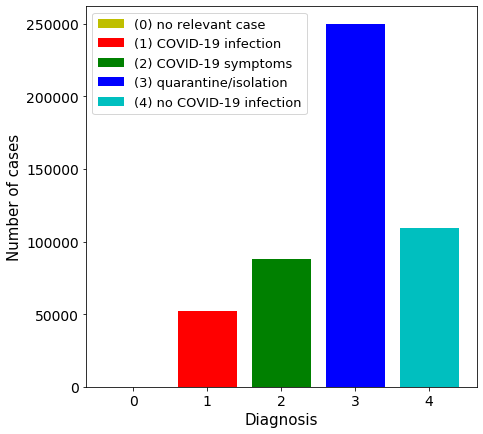

In [9]:
import matplotlib.pyplot as plt

#x = range(0,5)
#y = [d0, d1, d2, d3, d4]

plt.figure(figsize=(7,7))
plt.bar(0, d0, color="y", align='center', label='(0) no relevant case')
plt.bar(1, d1, color="r", align='center', label='(1) COVID-19 infection')
plt.bar(2, d2, color="g", align='center', label='(2) COVID-19 symptoms')
plt.bar(3, d3, color="b", align='center', label='(3) quarantine/isolation')
plt.bar(4, d4, color="c", align='center', label='(4) no COVID-19 infection')
#plt.bar(x, y, width=[0.6, 0.6, 0.6, 0.6, 0.6], color=['y','r','g','b','c'], align='center', label="COVID")

plt.xlabel("Diagnosis", fontsize=15)
plt.ylabel("Number of cases", fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=13)

plt.show()

([<matplotlib.patches.Wedge at 0x2a11dcdd0c8>,
 [Text(1.2000000000000002, 0.0, '0'),
  Text(1.1354025226313351, 0.3884084340000878, '1'),
  Text(0.4194687413696309, 1.1242979920882976, '2'),
  Text(-1.177276508350349, -0.23242207917151708, '3'),
  Text(0.9261279356832423, -0.7630773530560951, '4')],
 [Text(0.7, 0.0, '0.0%'),
  Text(0.6623181382016121, 0.22657158650005121, '10.5%'),
  Text(0.2446900991322847, 0.6558404953848402, '17.6%'),
  Text(-0.6867446298710368, -0.13557954618338494, '49.9%'),
  Text(0.5402412958152246, -0.44512845594938877, '21.9%')])

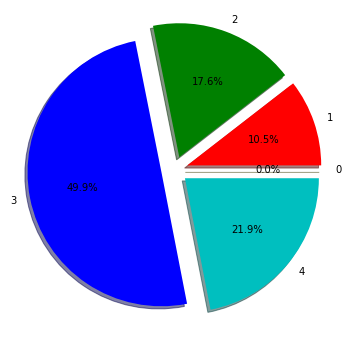

In [25]:
import matplotlib.pyplot as plt
#%matplotlib notebook

plt.figure(figsize=(6,6))
x = range(0,5)
y = [d0, d1, d2, d3, d4]
plt.axis("equal")
plt.pie(y, labels=x, colors=["y","r","g","b","c"], shadow=True, explode=[0.1,0.1,0.1,0.1,0.1], autopct='%1.1f%%')